In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Social_Network_Ads.csv')

In [4]:
df.drop(columns = ['User ID','Gender'],inplace = True)

In [5]:
X = df.drop(columns = ['Purchased'])
y = df['Purchased']

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
sc = StandardScaler()

transformer = ColumnTransformer(transformers = [('trf1',sc,[0,1])],remainder = 'passthrough')

In [8]:
X_train_transformed = transformer.fit_transform(X_train)
X_test_transformed = transformer.transform(X_test)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)

In [10]:
knn.fit(X_train_transformed,y_train)

KNeighborsClassifier()

Creating Decision boundary 

In [11]:
# Creating meshgrids 
a = np.arange(start = X_train_transformed[:,0].min()-1,stop = X_train_transformed[:,0].max()+1,step = 0.01)
b = np.arange(start = X_train_transformed[:,1].min()-1,stop = X_train_transformed[:,1].max()+1,step = 0.01)

XX,YY= np.meshgrid(a,b)

In [12]:
input_array = np.array([XX.ravel(),YY.ravel()]).T

In [13]:
labels = knn.predict(input_array)

Plotting array as an image

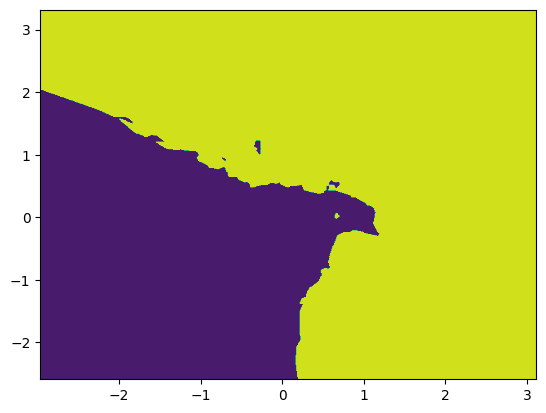

In [14]:
plt.contourf(XX,YY,labels.reshape(XX.shape))

Plotting all the training data on the plot

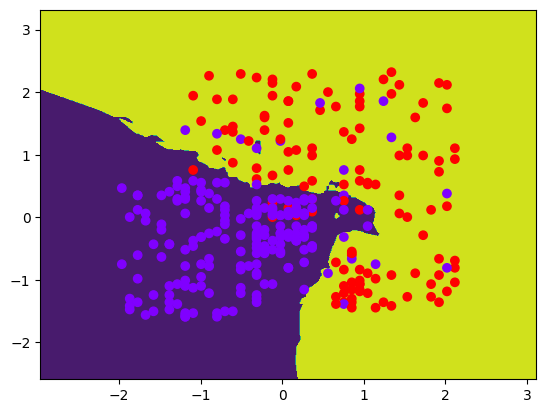

In [17]:
plt.contourf(XX,YY,labels.reshape(XX.shape))
plt.scatter(X_train_transformed[:,0],X_train_transformed[:,1],c = y_train,cmap = 'rainbow')